In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('../gurgaon_data/gurgaon_properties_outlier_treated.csv')

In [5]:
df.shape

(3561, 24)

In [6]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1686
built_up_area          1976
carpet_area            1719
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

In [7]:
#import column for us, user will input the value of build up area required
# hence there should be not missing values, need to fill the missing values through logical steps
# important parameter

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

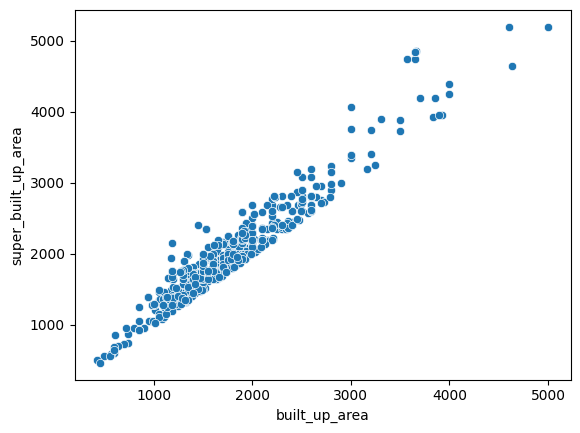

In [7]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

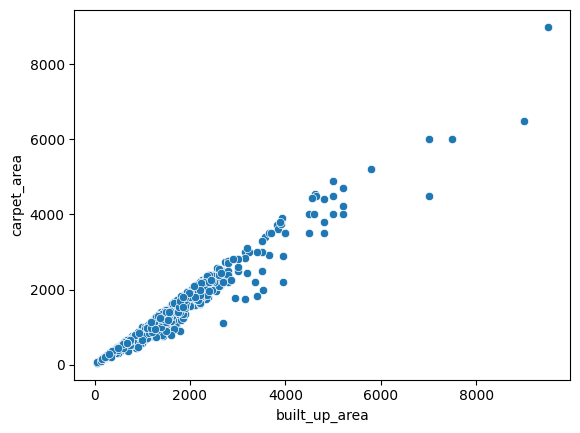

In [8]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [9]:
df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))].shape

(7, 24)

In [10]:
#all three present
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [11]:
all_present_df.shape

(531, 24)

In [12]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [14]:
print(super_to_built_up_ratio,'and',carpet_to_built_up_ratio)

1.105263157894737 and 0.9


In [15]:
# built up and carpet present
# built up area not there
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,1,8,360.333333
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,1,159,266.000000
38,flat,corona optus,sector 37c,1.25,7176.0,1742.0,Super Built up area 1735(161.19 sq.m.)Carpet a...,3,3,3,2.0,North-West,Relatively New,1735.0,NaN,1400.0,1,0,0,0,0,1,49,580.666667
40,flat,m3m merlin,sector 67,2.80,13679.0,2047.0,Super Built up area 2047(190.17 sq.m.)Carpet a...,3,3,3,5.0,North-East,Moderately Old,2047.0,NaN,1880.0,0,1,0,0,0,0,26,682.333333
45,flat,smart world orchard,sector 61,2.10,13752.0,1527.0,Super Built up area 1549(143.91 sq.m.)Carpet a...,3,2,3,3.0,South,Under Construction,1549.0,NaN,1500.0,0,0,0,0,0,1,146,509.000000


In [17]:
sbc_df.loc[:, 'built_up_area'] = sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2))

In [18]:
df.update(sbc_df)

In [19]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1686
built_up_area          1555
carpet_area            1719
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [20]:
# only super_built_up_area and carpet area is null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [21]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
5,flat,paras quartier,gwal pahari,7.50,14019.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,20.0,North-East,New Property,5350.0,NaN,NaN,0,1,0,1,1,2,49,1337.500000
6,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,14.0,East,Relatively New,2338.0,NaN,NaN,0,1,0,0,0,1,95,779.333333
7,flat,adani m2k oyster grande,sector 102,1.90,9104.0,2087.0,Super Built up area 1889(175.49 sq.m.),3,4,3,8.0,North-East,Relatively New,1889.0,NaN,NaN,0,1,0,0,0,1,165,695.666667
12,flat,ats tourmaline,sector 109,2.25,8704.0,2585.0,Super Built up area 2585(240.15 sq.m.),3,4,3,14.0,North-East,Relatively New,2585.0,NaN,NaN,0,1,0,0,0,1,101,861.666667
15,flat,bestech park view sanskruti,sector 92,1.55,7568.0,2048.0,Super Built up area 1995(185.34 sq.m.),3,4,3,16.0,South,Relatively New,1995.0,NaN,NaN,0,1,0,0,0,2,60,682.666667


In [22]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\1714170073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)
C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\1714170073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(rou

In [23]:
df.update(sb_df)

In [24]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1686
built_up_area           680
carpet_area            1719
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [25]:
# only carpet area is present here
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [26]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,1,38,552.50
11,flat,dlf regency park,sector 28,1.60,14545.0,1100.0,Carpet area: 1100 (102.19 sq.m.),2,2,2,3.0,North,Relatively New,NaN,NaN,1100.0,0,0,0,0,0,1,52,550.00
13,flat,emaar mgf emerald floors premier,sector 65,2.77,14025.0,1975.0,Carpet area: 1975 (183.48 sq.m.),4,4,3+,3.0,North-East,Relatively New,NaN,NaN,1975.0,1,1,0,0,0,0,174,493.75
19,flat,afnhb jalvayu vihar,sector 30,0.85,12859.0,661.0,Carpet area: 661 (61.41 sq.m.),2,2,1,2.0,West,Old Property,NaN,NaN,661.0,0,0,0,0,1,2,49,330.50
25,flat,chanderlok society,sector 28,0.90,7235.0,1244.0,Carpet area: 1244 (115.57 sq.m.),4,2,3+,1.0,NaN,Old Property,NaN,NaN,1244.0,0,0,0,0,0,1,0,311.00


In [27]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\2136919732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)
C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\2136919732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['carp

In [28]:
df.update(c_df)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1014
agePossession             0
super_built_up_area    1686
built_up_area             7
carpet_area            1719
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [35]:
all_nan = df[df['built_up_area'].isnull()]

# df = df[df['built_up_area'].notnull()]

df = df.dropna(subset=['built_up_area'])


In [36]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1013
agePossession             0
super_built_up_area    1679
built_up_area             0
carpet_area            1712
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

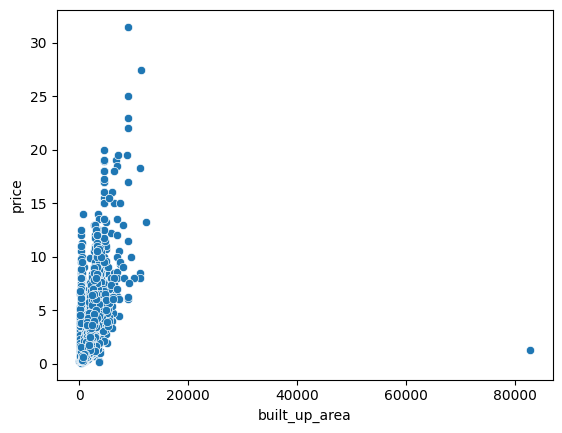

In [38]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [41]:
df[df['built_up_area'] > 60000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
44,house,ganpati heights apartment,sector 13,1.25,12077.0,1035.0,Plot area 115(7692.86 sq.m.),1,6,2,3.0,South-East,Old Property,NaN,82775.17,NaN,0,0,0,0,1,1,7,1035.0


In [45]:
df = df[df['built_up_area']< 60000]

<Axes: xlabel='built_up_area', ylabel='price'>

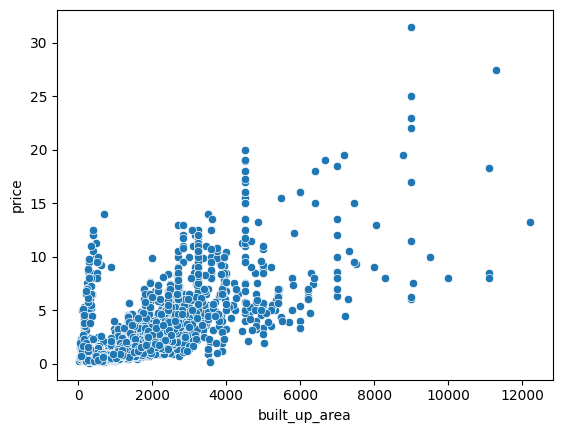

In [46]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [47]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]
anamoly_df.shape

(263, 3)

In [48]:
# huge difference in the area and build_up_area column values, may be because of data
# simply swap the values
anamoly_df.sample(5)

,price,area,built_up_area
3058,5.30,1935.0,1934.33
239,2.55,1630.0,1811.00
1188,2.85,1950.0,1920.00
2625,2.60,1080.0,1079.66
2860,5.50,3240.0,355.00


In [49]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [50]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

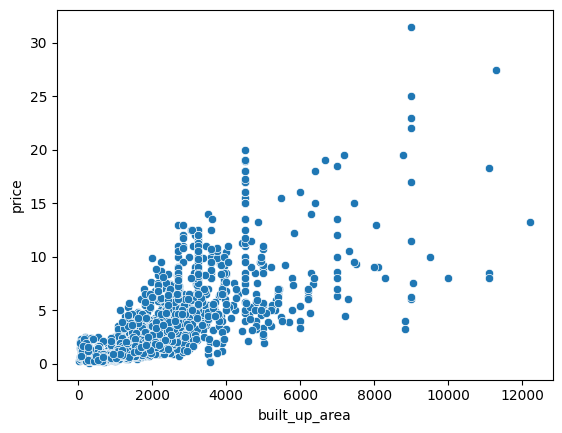

In [51]:
sns.scatterplot(x=df['built_up_area'],y=df['price'])  # now above shown graph is changed and looking more linear characterstics value

In [52]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\1475093290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)


In [53]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,NaN,New Property,850.0,0,0,0,0,0,1,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,NaN,New Property,1226.0,1,1,0,0,0,1,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,NaN,New Property,1000.0,0,0,0,0,0,1,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,North-West,Relatively New,1615.0,0,1,0,0,1,2,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,North-East,Relatively New,582.0,0,0,1,0,0,1,159


In [54]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1013
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [55]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
500,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,584.81,0,0,0,0,0,1,0
768,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4318.42,0,0,0,0,0,1,9
1296,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.00,0,0,0,0,0,1,0
1454,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3238.87,0,0,0,0,0,1,21
1467,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.00,0,0,0,0,0,1,0
1951,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.00,0,0,0,0,0,1,0
2053,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3238.87,0,1,1,1,0,1,88
2162,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4633.36,0,0,0,0,0,1,0
2276,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.00,0,1,1,1,0,2,114
2444,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.00,0,1,0,1,0,2,130


In [56]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [57]:
df['floorNum'].fillna(2.0,inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\15612474.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0,inplace=True)
C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\15612474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floorNum'].fillna(2.0,inplace=True)


In [58]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1013
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [59]:
1011/df.shape[0]

0.2845482690683929

### facing

<Axes: ylabel='count'>

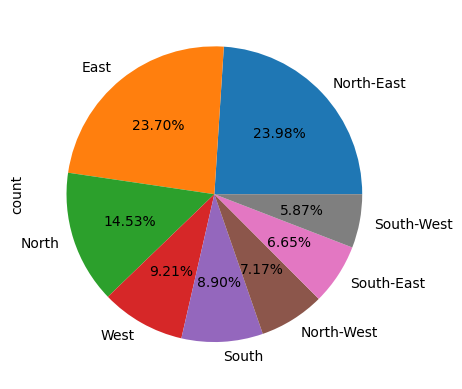

In [60]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [61]:
df.drop(columns=['facing'],inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\3119644739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['facing'],inplace=True)


In [62]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3329,flat,hcbs sports ville,sohna road,0.30,4011.0,2,2,2,3.0,Undefined,743.0,0,0,0,0,0,1,0
680,flat,tulip lemon,sector 69,0.62,12863.0,2,2,1,4.0,Relatively New,536.0,0,0,0,0,0,2,108
397,flat,emaar mgf emerald floors premier,sector 65,2.25,13636.0,3,3,3,3.0,Relatively New,1600.0,1,1,0,0,0,2,49
2208,flat,birla navya,sector 63a,3.15,14631.0,3,3,3,4.0,Under Construction,2153.0,0,0,0,0,1,1,44
2220,flat,indiabulls centrum park,sector 103,1.05,5859.0,2,2,3,1.0,Relatively New,1365.0,0,0,0,0,0,2,51


In [63]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [64]:
df.drop(index=[2536],inplace=True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\2461853807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[2536],inplace=True)


In [65]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [66]:
df['agePossession'].value_counts()

# need to solve meaning of the undefined section
# try to find some sort of realtion between agePossession and property_type (statistical realtion)
# then fill out the values for undefined agePossession

agePossession
Relatively New        1604
New Property           556
Moderately Old         543
Undefined              293
Old Property           292
Under Construction     264
Name: count, dtype: int64

In [67]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6568.0,3,2,0,1.0,Undefined,2360.0,0,0,0,0,0,1,0
33,house,greenopolis,sector 89,0.70,5397.0,2,2,2,14.0,Undefined,1297.0,0,0,0,0,0,1,0
48,flat,smart world gems,sector 89,1.71,12000.0,3,2,0,3.0,Undefined,1423.0,0,0,0,0,0,1,45
70,flat,rof aalayas,sector 102,0.45,6000.0,1,1,2,6.0,Undefined,750.0,0,0,0,0,0,1,0
74,house,bhim garh kheri,sector 3,1.50,7576.0,7,2,0,1.0,Undefined,1979.3,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Undefined,1548.0,0,0,0,0,0,1,0
3508,flat,signature global city,sector 37d,1.10,9839.0,2,2,2,4.0,Undefined,1242.0,0,0,0,0,0,1,59
3514,house,independent,sector 21,0.45,8411.0,3,2,1,1.0,Undefined,594.0,0,0,0,0,0,1,0
3526,flat,sidhartha ncr one,sector 95,0.57,4179.0,2,2,2,10.0,Undefined,1364.0,0,0,0,0,0,1,0


In [68]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [69]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\4034012990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agePossession'] = df.apply(mode_based_imputation,axis=1)


In [70]:
df['agePossession'].value_counts()

agePossession
Relatively New        1715
New Property           596
Moderately Old         582
Old Property           326
Under Construction     278
Undefined               55
Name: count, dtype: int64

In [71]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [72]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\3682362591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agePossession'] = df.apply(mode_based_imputation2,axis=1)


In [73]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           597
Moderately Old         589
Old Property           329
Under Construction     278
Undefined               33
Name: count, dtype: int64

In [74]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [75]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

C:\Users\nitis\AppData\Local\Temp\ipykernel_10800\4276506457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agePossession'] = df.apply(mode_based_imputation3,axis=1)


In [76]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         620
New Property           597
Old Property           329
Under Construction     278
Name: count, dtype: int64

In [77]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [78]:
df.to_csv('../gurgaon_data/gurgaon_properties_missing_value_imputation.csv',index=False)

In [79]:
df.shape

(3552, 18)

In [80]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64